<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-данных" data-toc-modified-id="Изучение-общей-информации-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Есть ли зависимость между наличием детей и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Есть ли зависимость между семейным положением и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** - проверить 4 гипотезы (дать ответы на 4 вопроса):
1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?

## Изучение общей информации о данных

In [1]:
import pandas as pd # импорт библиотеки pandas
solvency_stat = pd.read_csv('/datasets/data.csv') #чтение файла с данными и сохраненние в переменной 
# solvency_stat (статистика платежеспособности)

In [2]:
solvency_stat.head(10) # вывод первых 10 строчек таблицы, чтобы первоначально ознакомиться с содержанием

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
solvency_stat.info() # получение общей информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Таблица имеет 12 столбцов и 21525 строк. Присутсвует типы данных int, float и object.
В каждой строке таблицы - данные об одном клиенте.

Согласно документации к данным названия столбцов:
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

Названия колонок соответствуют правилам хорошего стиля, поэтому переименование колонок не требуется.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения, а именно в столбцах `days_employed` и `total_income`. Причину появления пропущенных значений постараюсь установить далее. Также в столбце `days_employed` имеются артефакты в виде отрицательных значений.

В колонке `education` имеются неявные дубликаты, связанные с написанием значений в разном регистре.
Также, пары колонок `education` - `education_id` и `family_status` - `family_status_id` скорее всего являются парами "словарь-значение", но это ещё лучше перепроверить.

## Предобработка данных

### Обработка пропусков

По общей информации по таблице определено, что "ожидаемые" пропуски находятся в столбцах `days_employed` и `total_income`.

In [4]:
solvency_stat.isna().sum() # убеждаемся, что пропущенные значения находятся именно в вышеупомянутых столбцах.

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Как видно из последовательного вызова методов `isna()` и `sum()` количество пропущенных значений в двух столбцах совпадает. Проверим, соответствуют ли пропущенные значения в колонке `days_employed` пропущенным значениям в колонке `total_income`. 
Для этого создадим фильтр для пропущенных значений `days_employed` и посчитаем количество значений в `total_income`:

In [5]:
solvency_stat[solvency_stat['days_employed'].isna()]['total_income'].count() # подсчет ненулевых (не пропущенных) значений 
# в столбце total_income при фильтре на пропущенные значения в столбце days_employed

0

Значение **0** в выводе выше свидетельствует, что пропущенные значения в столбцах `days_employed` и `total_income` находятся в одних и тех же строчках.
**Причинами пропусков могут быть:**
1. Банк не указал данные для этих клиентов при формирование базы.
2. Клиент не имеет официального места работы (соответственно, у него нет стажа и нет информации о доходах).
3. Клиент пользуется кредитной картой, где при оформлении не надо указывать эти данные.

Сперва обработаем пропуски в столбце `total_income`. Это данные типа float и относятся к количественным переменным (поскольку значения можно между собой сравнить). Соответственно, пропуски в таких переменных необходимо заполнить характерными значениями - средним арифметическим или медианой. При анализе ежемесячного дохода воспользуемся значением медианы, чтобы защитить себя от выбросов с очень большими или очень маленькими значениями.

In [6]:
total_income_median = solvency_stat['total_income'].median() # расчет медианы для столбца total_income и сохранение в переменой
solvency_stat['total_income'] = solvency_stat['total_income'].fillna(total_income_median) # вызов метода fillna(), 
# который меняет пропущенные значения в столбце на значение в скобках метода
solvency_stat.isna().sum() # проверка пропусков

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

Пропуски в колонке `total_income` исчезли - теперь на их месте медианное значение дохода. 

Столбец `days_employed` помимо пропусков содержит артефакты: отрицательных значений дней трудового стажа в реальности быть не может. Прежде чем приступать к обработке пропусков, необходимо разобраться в причинах появления таких значений.

Проведем некоторый описательных анализ в данных в этом столбце: <a id='descriptive_analysis'></a>
1. Отфильтруем таблицу с отрицательными значениями столбца `days_employed`, чтобы посмотреть нет ли каких-то зависимостей со значениями других столбцов.
2. Выведем минимальные и максимальные значения столбца `days_employed` для отрицательного и положительного диапазона значений, чтобы сравнить модули значений.

In [7]:
solvency_stat[solvency_stat['days_employed'] < 0].head(20) # создаем фильтр для отрицательных значений по столбцу days_employed
# и выводим первые 20 строчек на экран

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи
10,2,-4171.483647,36,высшее,0,женат / замужем,0,M,компаньон,0,113943.491460,покупка недвижимости


In [8]:
print(f"Минимальное отрицательное значение дней стажа: {solvency_stat[solvency_stat['days_employed'] < 0]['days_employed'].min()}")
print(f"Максимальное отрицательное значение дней стажа: {solvency_stat[solvency_stat['days_employed'] < 0]['days_employed'].max()}")
print(f"Минимальное положительное значение дней стажа: {solvency_stat[solvency_stat['days_employed'] >=0]['days_employed'].min()}")
print(f"Максимальное положительное значение дней стажа: {solvency_stat[solvency_stat['days_employed'] >=0]['days_employed'].max()}")

Минимальное отрицательное значение дней стажа: -18388.949900568383
Максимальное отрицательное значение дней стажа: -24.14163324048118
Минимальное положительное значение дней стажа: 328728.72060451825
Максимальное положительное значение дней стажа: 401755.40047533


**Итог [описательного анализа](#descriptive_analysis):**
1. В выводе первых 20 строк таблицы с отрицательными значениями колонки `days_employed` очевидных закономерностей со значенями других столбцов не найдены. (*также я выводил последние 20 строчек таблицы*)
2. Диапазоны положительных и отрицательных значений отличаются. Соответственно, отрицательные значения скорее являются следствием системы расчета дней трудового стажа, а не ошибкой системы.
3. Поскольку для положительного диапазона я включал 0 (*>= 0 при фильтрации*), а минимальное значение больше 0, соответственно, нулевых значений в данной колонке нет.

Выведем первые 20 строк таблицы, отфильтрованный по положительным значениям колонки `days_employed`.

In [9]:
solvency_stat[solvency_stat['days_employed'] > 0].head(20) # создаем фильтр для положительных значений по столбцу days_employed
# и выводим первые 20 строчек на экран

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью
35,0,394021.072184,68,среднее,1,гражданский брак,1,M,пенсионер,0,77805.677436,на проведение свадьбы
50,0,353731.432338,63,среднее,1,женат / замужем,0,F,пенсионер,0,92342.730612,автомобили
56,0,370145.087237,64,среднее,1,вдовец / вдова,2,F,пенсионер,0,149141.043533,образование
71,0,338113.529892,62,среднее,1,женат / замужем,0,F,пенсионер,0,43929.696397,автомобили
78,0,359722.945074,61,высшее,0,женат / замужем,0,M,пенсионер,0,175127.646000,сделка с автомобилем


Можно заметить, что в колонке `income_type` в первых 20 строках присутствует только одно значение - *пенсионер*.
Проверим, какие уникальные значения в этом столбце присутствуют:

In [10]:
solvency_stat[solvency_stat['days_employed'] > 0]['income_type'].unique() # фильтруем таблицу для положительных значений
# колонки days_employed. После чего вызываем метод unique() к колонке income_type для поиска уникальных значений 

array(['пенсионер', 'безработный'], dtype=object)

Посмотрим, какие уникальные значения хранятся в столбце `income_type` для всей таблицы. Для этого вызовем метод *value_counts()*, чтобы сразу осуществить подсчет этих уникальных значений в таблице. <a id='income_type_value_counts'></a>

In [11]:
solvency_stat['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

**Итого по артефактам**:
1. Положительные значения дней общего трудового стажа соответствуют двум категориям клиентов: *пенсионеры* и *безработные*. Причем под *безработными* скорее понимаются клиенты, которые уже имели какое-то место работы, но ушли с него.
2. Отрицательные значения дней общего трудового стажа соответствуют всем остальным категориям клиентов, у которых в данный момент есть работа или которые обучаются (*студент*).
3. **Причиной появления артефактов** может быть система подсчета банком дней трудового стажа. Так, для клиентов, ушедших с работы формула имеет примерный вид: *Дата окончания работы* - *Дата начала работы*. А для клиентов, которые трудоустроены на момент получения кредита: *Дата начала работы* - *Сегодняшняя дата*. Возможно, стоит сказать разработчикам, чтобы правильно настроили формулу, чтобы в дальнейшем избегать появления артефактов.

4. Также я заметил, что в столбце `dob_years` имеется значение, равное 0. Возраст не может равняться такому значению. Это "странный" пропуск, который есть возможность обработать.

Для обработки отрицательных значений в колонке `days_employed` приведем их к модулю функцией *abs()*.

In [12]:
solvency_stat['days_employed'] = abs(solvency_stat['days_employed']) # перезаписываем столбец с положительными значениями
solvency_stat[solvency_stat['days_employed'] < 0]['days_employed'].count() #проверяем, что в колонке не осталось 
# отрицательных значений

0

In [45]:
# Альтернативный способ убрать отрицательные значения, применив метод из библиотеки pandas для колонки
# solvency_stat['days_employed'].abs() 

0          8437
1          4024
2          5623
3          4124
4        340266
          ...  
21204      4529
21205    343937
21206      2113
21207      3112
21208      1984
Name: days_employed, Length: 21209, dtype: int64

С артефактами удалось справиться, обработаем пропущенные значения в колонке `days_employed`. Здесь хранятся данные типа float и относятся к количественным переменным. Значит, пропуски заменим на характерное значение - в данном случае, медиану, которая будет рассчитана отдельно для пропусков в строках с типом занятости *пенсионеры* и *безработные* и отдельно для всех остальных типов.
Для начала посмотрим, какие уникальные значения в колонке `income_type` соответствуют пропущенным значениям в колонке `days_employed`:

In [13]:
solvency_stat[solvency_stat['days_employed'].isna()]['income_type'].unique() # поиск уникальных значений income_type
# для строк с пропусками в колонке days_employed

array(['пенсионер', 'госслужащий', 'компаньон', 'сотрудник',
       'предприниматель'], dtype=object)

Создадим два фильтра:
1. При значение `income_type` равном *пенсионер*
2. При значение `income_type` не равном *пенсионер*

И посчитаем медианное значение в колонке `days_employed` для каждого случая методом *median()*

In [3]:
days_employed_median_pens = solvency_stat[solvency_stat['income_type'] == 'пенсионер']['days_employed'].median()
days_employed_median_not_pens = solvency_stat[solvency_stat['income_type'] != 'пенсионер']['days_employed'].median()

#заменим пропущенные значения в столбце days_employed на медианные значения при помощи метода fillna()
solvency_stat[solvency_stat['income_type'] == 'пенсионер'] = solvency_stat[solvency_stat['income_type'] == 'пенсионер'].fillna(days_employed_median_pens)
solvency_stat[solvency_stat['income_type'] != 'пенсионер'] = solvency_stat[solvency_stat['income_type'] != 'пенсионер'].fillna(days_employed_median_not_pens)

solvency_stat.isna().sum() #проверка, что пропущенных значений больше нет

SyntaxError: invalid syntax (<ipython-input-3-e1ac72d197e5>, line 1)

В таблице не осталось "ожидаемых" пропусков. Перейдем к обработке "странных". 
Как уже было сказано выше, в колонке `dob_years` имеются значения равные 0, чего не может быть в реальности. Вряд ли банк выдает кредиты лицам моложе 18 лет. Значения в данном столбце относятся к типу данных int и количественным переменным. Следовательно, заменяем пропуски на характерное значение - в данном случае, среднее арифметическое.
Взять общее среднее не совсем корректно, поскольку клиенты делятся по типу занятости и для каждого типа занятости свой возраст.

**Ход обработки пропусков:**
1. Поиск уникальных значений типа занятости клиентов для строк, где в колонке `dob_years` значение равно 0.
2. Поиск среднее арифметического значения возраста для каждого типа занятости.
3. Замена нулей соответствующим значением среднего арифметического для каждого типа занятости в столбце `dob_years`.

In [15]:
income_type = solvency_stat[solvency_stat['dob_years'] == 0]['income_type'].unique() # Поиск уникальных значений типа занятости 
# при возрасте = 0 и сохранение списка значений в переменной.

# далее создаем цикл, который проходит по значениям в списке income_type, считает средний возраст для каждого типа занятости
# сразу же приводит значение среднего арифметического возраста к типу int (потому что возраст в таблице представлен в int)
# и заменяет 0 в колонке на значение среднего арифметического возраста.
for i in income_type:
    dob_years_average = int(solvency_stat[solvency_stat['income_type'] == i]['dob_years'].mean())
    solvency_stat.loc[(solvency_stat['dob_years'] == 0) & (solvency_stat['income_type'] == i), 'dob_years'] = dob_years_average
    
    
solvency_stat[solvency_stat['dob_years'] == 0]['dob_years'].count() # проверяем, что нулей в колонке возраста больше нет

0

Пропущенные, а точнeе нулевые значения в колонке возраста обработаны и заменены на среднее арифметическое значение возраста для каждого типа занятости.

Проверим остальные столбцы на наличие "странных" пропусков и артефактов
- колонки `education_id`, `family_status_id` и `debt` содержат значения типа int и могут принимать нулевые значения, а также не содержать "ожидемых" пропусков. Поэтому их не проверяем.
- колонки `total_income` и `days_employed` содержали "ожидаемые" пропуски, которые уже обработаны.
- к колонке `income_type` применялся метод [value_counts()](#income_type_value_counts). Пропущенных значений в колонке нет.
- колонка `dob_years` содержала "странные" пропуски в виде нулевых значений, которые уже обработаны.
- осталось проверить колонки `education`, `family_status`, `gender` и `purpose`. Проверим "странные" пропуски, вызвав метод unique() для каждого столбца

In [16]:
print(f"-* уникальные значения столбца children: {solvency_stat['children'].unique()}")
print(f"-* уникальные значения столбца education: {solvency_stat['education'].unique()}")
print(f"-* уникальные значения столбца family_status: {solvency_stat['family_status'].unique()}")
print(f"-* уникальные значения столбца gender: {solvency_stat['gender'].unique()}")
print(f"-* уникальные значения столбца purpose: {solvency_stat['purpose'].unique()}")

-* уникальные значения столбца children: [ 1  0  3  2 -1  4 20  5]
-* уникальные значения столбца education: ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
-* уникальные значения столбца family_status: ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
-* уникальные значения столбца gender: ['F' 'M' 'XNA']
-* уникальные значения столбца purpose: ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерчес

- "Странные" пропуски есть в колонке `gender` в виде значения *XNA*. Поскольку значения в колонке относятся к категориальным переменным и уже имеют свое характерное значение, а восстановить нет возможности, то пускай так и останется. Теперь мы знаем, что в колонке имеются пропуски.
- Артефакты находятся в колонке `children` в виде чисел *-1* и *20*, которые могут являться характерными значениями. Значение *-1* скорее всего свидетельствует о пропуске данных в этом случае, а значение *20* свидетельствует о том, что у клиента больше 5 детей.
- В колонке `education` нет пропусков, но есть неявные дубликаты в виде записи в разном регистре

**Вывод**

1. "Ожидаемые" пропуски находились в колонках: `total_income` и `days_employed`. Причем строчки с пропусками для этих колонок совпадали.

    Причины появления пропусков могут быть следующие:
    * Банк не указал данные для этих клиентов при формирование базы.
    * Клиент не имеет официального места работы (соответственно, у него нет стажа и нет информации о доходах).
    * Клиент пользуется кредитной картой, где при оформлении не надо указывать эти данные.

2. "Странные" пропуски находились в колонках: `dob_years` и `gender`.

    Причиной появления пропусков вероятней всего является утеря данных и заполнение этих значений в виде характерных значений (*0* и *XNA*)
    
**Способы обработки пропусков:**
- Данные в колонках `total_income` и `days_employed` относятся к типу float и количественным переменным, пропуски были заменены на характерное медианное значение по столбцу или по группе данных.
- Данные в колонке `dob_years` относятся к количественным переменным. В этом случае пропуски были заменены на среднее арифметическое значение возраста по каждому типу занятости.
- Данные в колонках `gender` и `children` уже имеют свои характерные значения, менять которые не имеет смысла. Возможно, стоит внести это значение в документацию к данным.

### Замена типа данных

В таблице имеются две колонки с вещественным типом данных - `total_income` и `days_employed`. Для перевода в целочисленный тип применим метод *astype()* к этим столбцам. Во избежании остановки кода из-за ошибки, завернем применение метода в конструкцию *try-except*.

In [17]:
try:
    solvency_stat['total_income'] = solvency_stat['total_income'].astype('int')
    solvency_stat['days_employed'] = solvency_stat['days_employed'].astype('int')
except:
    print('Не удалось перевести вещественное число в целочисленное')
    
solvency_stat.info() # проверяем, какие типы данных остались в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

В таблице остались данные с типами int и object, значит нам удалось избавиться от вещественных чисел.

Метод *to_numeric()* возвращает вещественные данные (типа float). Нам же необходимо было перевести данные в целочисленные тип int, для чего подходит метод *astype()*. Поэтому он и был выбран.

### Обработка дубликатов

Выше уже было определено, что столбец `education` содержит неявные дубликаты в виде написания в разном регистре. Обработаем этот дубликат в первую очередь, вызвав метод *str.lower()* к столбцу.

In [18]:
solvency_stat['education'] = solvency_stat['education'].str.lower() # перезаписываем значения в столбце education, 
# применив к этому столбцу метод str.lower(), который приводит текст к нижнему регистру
solvency_stat['education'].unique() # вызываем метод unique() для поиска уникальных значений и проверки, 
# что все данные в нижнем регистре

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

По уникальным значениям в столбце видно, что обработка прошла успешно и неявных дубликатов больше не осталось. Проверим на наличие явных дубликатов в строках, вызвав последовательно методы *duplicated()* и *sum()* к таблице. 

In [19]:
solvency_stat.duplicated().sum() # подсчет количества явных дубликатов в таблице

71

В таблице имеется 71 явный дубликат. Воспользуемся методом *drop_duplicates()* совместно с методом *reset_index(drop = True)*, чтобы очистить таблицу от дубликатов и обновить индексацию.

In [20]:
solvency_stat = solvency_stat.drop_duplicates().reset_index(drop=True) #удаляем явные дубликаты и перезаписываем таблицу
solvency_stat.duplicated().sum() #проверяем, что в таблице не осталось дубликатов. 0 будет означать, что дубликатов больше нет

0

**Вывод**

В таблице присутствовали явные и неявные дубликаты.
- В колонке `education` данные об образовании были написаны в разном регистре. Мы исправили это, приведя все данные в колонке к нижнему регистру. **Причиной** появления таких дубликатов может быть проблема при внесении данных (каждый человек-оператор по своему вводил информацию)
- Также в таблице имелось 71 явный дубликат (повтор строк). Мы удалили дублирующие строки методом *drop_duplicates()* и обновили индексы методом *reset_index()* с аргументом *drop=True*. **Причиной** задвоения информации может быть технологическая ошибка при выгрузке данных, которая продублировала информацию некоторых строк.

### Лемматизация

В столбце `purpose` также содержаться дубликаты, которые связаны с разными формами написания слов о причинах взятия кредита. Для того, чтобы устранить такие дубликаты, проведем лемматизацию данных - приведем к начальным формам. В первую очередь необходимо импортировать библиотеку *pymystem3*, а точнее анализатор *Mystem()* из этой библиотеки.

In [21]:
from pymystem3 import Mystem #импортируем анализатор Mystem() из библиотеки pymystem3
m = Mystem() #записываем анализатор в переменную

Создадим цикл, который пройдется по всем строкам таблицы, лемматизирует данные в столбце `purpose` и заменит значения в колонке на лемматированные.

In [22]:
for index in range(len(solvency_stat)): # создание цикла, который проходится по всем строкам
    lemmas = m.lemmatize(solvency_stat['purpose'][index]) # в переменную lemmas сохраняем список после лемматизации
    lemmas.pop() # удаляем последний элемент списка, которым является "\n" - перенос строки
    lemmas_str = ''.join(lemmas) #преобразовываем лемматированный список в строку
    solvency_stat.loc[index, 'purpose'] = lemmas_str #заменяем значения в столбце purpose
    
solvency_stat.head() #проверяем изменения выводом первых 5 строчек

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилье
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилье
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительный образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьба


Посмотрим с помощью метода *value_counts()* на уникальные значения в леммитированном столбце `purpose` и количество их повторений.

In [23]:
solvency_stat['purpose'].value_counts()

автомобиль                                972
свадьба                                   791
на проведение свадьба                     768
сыграть свадьба                           765
операция с недвижимость                   675
покупка коммерческий недвижимость         661
операция с жилье                          652
покупка жилье для сдача                   651
операция с коммерческий недвижимость      650
жилье                                     646
покупка жилье                             646
покупка жилье для семья                   638
строительство собственный недвижимость    635
недвижимость                              633
операция со свой недвижимость             627
строительство жилой недвижимость          624
покупка недвижимость                      621
покупка свой жилье                        620
строительство недвижимость                619
ремонт жилье                              607
покупка жилой недвижимость                606
на покупка свой автомобиль        

Исходя из списка уникальных значений, можно выделить 4 основные причины взять кредит у клиентов:
1. Автомобиль
2. Жилье / недвижимость
3. Свадьба
4. Образование

Напишем функцию, которая на входе принимает значение выше, таблицу и колонку, а на выходе возвращает таблицу, с измененным значением в колонке `purpose`. Таким образом упростим информацию в колонке целей получения кредита.

In [24]:
# создаем функцию lemmas_purpose с аргументами lemmas - лемматированное значение уникальной цели получения кредита, 
# data - таблица с данными, column = колонка таблицы. Сразу задаем значения по умолчанию для аргументов data и column.
# в теле функции проходим циклом по строкам цикла. Если значение lemmas содержится в значении колонки purpose,
# то меняем его на значение lemmas
def lemmas_purpose(lemmas, data=solvency_stat, column='purpose'):
    for index in range(len(data)):
        if lemmas in data[column][index]:
            data.loc[index, 'purpose'] = lemmas
            
    return data

# вызываем функцию для каждого уникального значения цели получения кредита (5 раз)
lemmas_purpose('автомобиль')
lemmas_purpose('жилье')
lemmas_purpose('недвижимость')
lemmas_purpose('свадьба')
lemmas_purpose('образование')
solvency_stat['purpose'].value_counts() # проверяем работу функции, вызывая метод по поиску уникальных значений.

недвижимость    6351
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: purpose, dtype: int64

В колонке `purpose` осталась только нужная информация о целях получения кредита. 
После всех изменений проверим таблицу на явные дубликаты (на всякий случай, не появились ли они)

In [25]:
solvency_stat.duplicated().sum()

245

Появились новые дубликаты в строках. Вероятно, при занесении данных в таблицу, оператор по-разному указывал данные о целях кредита, но все остальные данные были введены корректно. Повторим процедуру удаления дубликатов.

In [26]:
solvency_stat = solvency_stat.drop_duplicates().reset_index(drop=True) #удаляем явные дубликаты и перезаписываем таблицу
solvency_stat.duplicated().sum() #проверяем, что в таблице не осталось дубликатов. 0 будет означать, что дубликатов больше нет

0

От дубликатов в строках повторно избавились!

**Вывод**

Информация в колонке `purpose` была представлена в виде строки (тип str), которые содержали в себе грамотические ошибки и лишнюю информацию. Для проверки 4ой гипотезы (ответа на 4ый вопрос) информацию в этой колонке необходимо обработать. Сделано это было при помощи лемматизации данных в несколько этапов:
1. На первом этапе мы подключили необходимую библиотеку и анализатор.
2. На втором этапе при помощи цикла нашли лемматизированные данные и заменили данные в колонке
3. На третьем этапе нашли уникальные значения в колонке после лемматизации для выявления основных целей для получения кредита.
4. На четвертом этапе при помощи функции убрали лишнюю информацию из колонки `purpose`, оставив только суть цели получения кредита.

После изменения данных повторно провели таблицу на наличие явных дубликатов и их удаление из таблицы.

### Категоризация данных

В таблице имеется два "словаря" - две пары колонок, которые можно вынести в отдельные таблицы категорий. Это пары `education` - `education_id` и `family_status` - `family_status_id`. Выделим из таблицы первую пару колонок.

In [27]:
education_dict = solvency_stat[['education_id', 'education']] # при помощи индексации оставляем только две колонки в переменной
education_dict.head(10) # выводим первые 10 строк

,education_id,education
0,0,высшее
1,1,среднее
2,1,среднее
3,1,среднее
4,1,среднее
5,0,высшее
6,0,высшее
7,1,среднее
8,0,высшее
9,1,среднее


In [28]:
education_dict = education_dict.drop_duplicates().reset_index(drop=True) #удаляем дубликаты
education_dict

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


Первый словарь готов. Аналогично сделаем второй:

In [29]:
family_status_dict = solvency_stat[['family_status_id', 'family_status']] #при помощи индексации оставляем только две колонки
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True) #удаляем дубликаты
family_status_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


Второй словарь тоже готов!
Уберем из основной таблицы ненужные колонки.

In [30]:
solvency_stat.drop(columns = ['education', 'family_status'], axis=1, inplace=True) # вызываем метод drop() и удаляем колонки 
# education и family_status. Аргумент inplace со значением True перезаписывает исходную таблицу

In [31]:
solvency_stat.head(10) # проверяем, что в таблице не осталось ничего лишнего

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,жилье
1,1,4024,36,1,0,F,сотрудник,0,112080,автомобиль
2,0,5623,33,1,0,M,сотрудник,0,145885,жилье
3,3,4124,32,1,0,M,сотрудник,0,267628,образование
4,0,340266,53,1,1,F,пенсионер,0,158616,свадьба
5,0,926,27,0,1,M,компаньон,0,255763,жилье
6,0,2879,43,0,0,F,компаньон,0,240525,жилье
7,0,152,50,1,0,M,сотрудник,0,135823,образование
8,2,6929,35,0,1,F,сотрудник,0,95856,свадьба
9,0,2188,41,1,0,M,сотрудник,0,144425,жилье


Словари готовы. Теперь категоризируем клиентов по общему ежемесячному доходу.
Сначала найдем минимальные и максимальные значения дохода:

In [32]:
print(f"Минимальный доход: {solvency_stat['total_income'].min()}")
print(f"Максимальный доход: {solvency_stat['total_income'].max()}")

Минимальный доход: 20667
Максимальный доход: 2265604


Диапазон значений дохода от 20 тыс до 2.265 млн. Разделим его на категории следующим образом:
1. Меньше 100 тыс - *сверхнизкий*
2. От 100 тыс до 150 тыс - *низкий*
3. От 150 тыс до 200 тыс - *средний*
4. От 200 тыс до 500 тыс - *высокий*
5. Больше 500 тыс - *сверхвысокий* 

    Создадим функцию `total_income_group`, которая возвращает группу по уровню дохода по значению дохода `total_income` по вышеприведенным правилам.

In [33]:
def total_income_group(total_income):
    if total_income < 100000:
        return 'сверхнизкий'
    if 100000 <= total_income < 150000:
        return 'низкий'
    if 150000 <= total_income < 200000:
        return 'средний'
    if 200000 <= total_income < 500000:
        return 'высокий'
    if total_income >= 500000:
        return 'сверхвысокий'
    
# проверим работоспособность функции для разных значений дохода    
print(total_income_group(12345))
print(total_income_group(678901))
print(total_income_group(190000))
print(total_income_group(250500))

сверхнизкий
сверхвысокий
средний
высокий


Созданная функция работает корректно. Создадим новый столбец в таблице, куда занесем данные об группе уровня дохода при помощи метода *apply()*, применив его к колонке `total_income`

In [34]:
solvency_stat['total_income_group'] = solvency_stat['total_income'].apply(total_income_group)
solvency_stat['total_income_group'].value_counts() #проверяем, что столбец действительно создался и уникальные значения в нем

низкий          7562
высокий         4844
сверхнизкий     4463
средний         4118
сверхвысокий     222
Name: total_income_group, dtype: int64

**Вывод**

В таблице присутсвовали две пары колонок, которые можно было выделить в отдельные словари, чтобы данные не мешались при проверке гипотез, чтобы не совершить в них ошибку.

Созданы **два словаря**:
1. `education_dict`
2. `family_status_dict`

Также произведена категоризация данных в колонке `total_income` по уровня дохода. Категоризированные данные хранятся в колонке `total_income_group`

## Проверка гипотез

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

Для ответа на вопрос проделаем следующие шаги:
1. Создадим сводную таблицу со следующими аргументами:
    * Столбец, по которому происходит группировка - `children`.
    * Значения, по которым будет формироваться сводная таблица - `debt`.
    * Функция, применяемая к значениям - *mean()* - т.е. поиск среднего значения (чем ближе к единице будет значение среднего, тем чаще кредит не возвращали в срок клиенты данной категории.

2. Построение столбчатой диаграммы, чтобы посмотреть зависимость:
    * Подключаем библиотеку **seaborn**
    * Вызываем метод *barplot* с соответствующими значениями осей
    
3. Поиск зависимости.

In [35]:
children_pivot = solvency_stat.pivot_table(index='children', values='debt', aggfunc='mean') # создание сводной таблицы
children_pivot.sort_values(by='debt', ascending=False).reset_index() # сортировка средних значений по убыванию и обновление индексов

,children,debt
0,20,0.105263
1,4,0.097561
2,2,0.094958
3,1,0.093023
4,3,0.082067
5,0,0.076452
6,-1,0.021277
7,5,0.000000


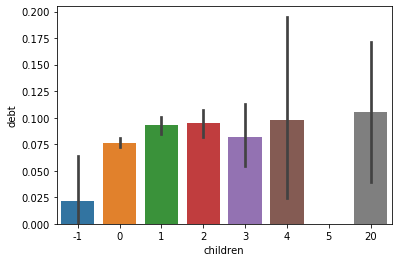

In [36]:
import seaborn as sns #подключение библиотеки seaborn
sns.barplot(x=solvency_stat['children'], y=solvency_stat['debt']) #построение столбчатой диаграммы

По сводной таблице мы видим уникальное значение для клиентов, имеющих 5 детей. Проверим количество таких клиентов, вызвав метод value_counts()

In [37]:
solvency_stat['children'].value_counts()

 0     13891
 1      4773
 2      2043
 3       329
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Клиентов с пятью детьми всего 9. По всей видимости, эти данные не совсем репрезентативны - недостаточно данных для клиентов,имеющих 5 детей.

**Вывод**

1. Прослеживается небольшая зависимость: с ростом количества детей у клиента выростает частота задержки платежа по кредиту. Просадка случается на количестве 3 ребенка, что не позволяет сказать о полной зависимости между количеством детей и возратом кредита в срок.
2. Данные содержат *артефакт*, связанный с недостаточным количеством клиентов, имеющих 5 детей. 9 клиентов из 21 тыс.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

Алгоритм ответа на этот вопрос аналогичен предыдущему, за исключением одного дополнительного шага. После создания сводной таблицы необходимо объединить её с словарем категоризации для семейного статуса.

In [38]:
 # создаем сводную таблицу
family_status_pivot = solvency_stat.pivot_table(index='family_status_id', values='debt', aggfunc='mean')
# объединяем две таблицы в одну
family_status_pivot = family_status_dict.merge(family_status_pivot, on='family_status_id', how='left')
# сортируем таблицу по убыванию средних значений debt и обновляем индексы
family_status_pivot.sort_values(by='debt', ascending=False).reset_index(drop=True)

,family_status_id,family_status,debt
0,4,Не женат / не замужем,0.098138
1,1,гражданский брак,0.093969
2,0,женат / замужем,0.076562
3,3,в разводе,0.071249
4,2,вдовец / вдова,0.066456


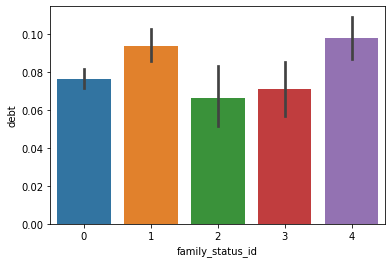

In [39]:
sns.barplot(x=solvency_stat['family_status_id'], y=solvency_stat['debt']) #построение столбчатой диаграммы

**Вывод**

1. Клиенты, потерявшие супруга/супругу (развод или гибель) реже задерживают платежи по кредитам.
2. Клиенты, которые не состоят и не состояли никогда в браке, чаще остальных не возвращают кредит в срок.
3. Зависимости в данном случае не может быть, поскольку одна из переменных (*семейный статус*) является категориальной (значения нельзя между собой сравнить). А зависимость предполагает, что с изменением одной переменой (ростом или снижением) происходит изменение другой. В данном случае изменение переменной происходит содержательное, смысловое, а не количественное.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Проделываем аналогичные шаги и для ответа на этот вопрос.

In [40]:
income_pivot = solvency_stat.pivot_table(index='total_income_group', values='debt', aggfunc='mean') # создание сводной таблицы
income_pivot.sort_values(by='debt', ascending=False).reset_index() # сортировка средних значений по убыванию и обновление индексов

,total_income_group,debt
0,средний,0.089364
1,низкий,0.087278
2,сверхнизкий,0.079319
3,высокий,0.071016
4,сверхвысокий,0.063063


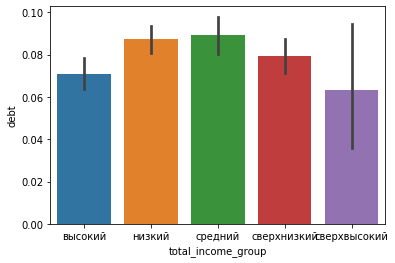

In [41]:
sns.barplot(x=solvency_stat['total_income_group'], y=solvency_stat['debt']) #построение столбчатой диаграммы

**Вывод**

1. Клиенты, имеющие высокий и сверхвысокий уровень дохода, реже остальных задерживают платежи.
2. Клиенты со средним и низким уровнем дохода, наоборот, чаще остальных не возвращают кредит в срок.

Прямой зависимости между уровнем дохода и возвратом кредита в срок нет.

### Как разные цели кредита влияют на его возврат в срок?

Повторим шаги и для ответа на этот вопрос

In [42]:
purpose_pivot = solvency_stat.pivot_table(index='purpose', values='debt', aggfunc='mean').reset_index()
purpose_pivot.sort_values(by='debt', ascending=False)

,purpose,debt
0,автомобиль,0.094101
3,образование,0.093340
4,свадьба,0.080659
2,недвижимость,0.075719
1,жилье,0.069889


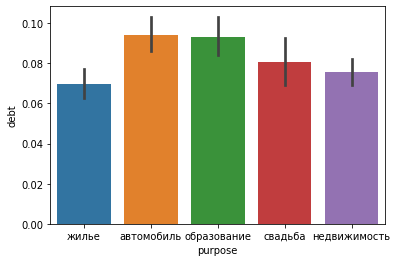

In [43]:
sns.barplot(x=solvency_stat['purpose'], y=solvency_stat['debt']) #построение столбчатой диаграммы

**Вывод**

1. Реже остальных задерживают платежи клиенты, которые берут кредит для жилья и недвижемости. Это может быть связано с тем, что ставки по ипотекам меньше, чем по обычным кредитам. Соответственно, меньше и ежемесячный платеж, его проще возвращать.
2. Клиенты, получившие кредит под автомобиль или образование задерживают платежи чаще других.

## Общий вывод

Были проверны четыре гипотезы (изучены 4 вопроса):
1. Зависимость между количеством детей у клиента и возвратом кредита в срок прослеживается, но неоднозначна.
2. Зависимость между семейным положением и возвратом кредита в срок отсутствует, потому что семейный статус относится к категориальным переменным.
3. Зависимость между уровнем дохода клиента и возвратом кредита в срок прослеживается для групп с высоким и сверхвысоким уровнем дохода - они реже остальных задерживают вылпаты. На остальных уровнях зависимость отсутствует.
4. Кредиты, полученные для операций с жильем и недвижимостью, реже неоплачиваются в срок, чем кредиты под автомобиль и образование. Это может связано с тем, что по ипотеке меньше ставка, и, соответственно, размер платежа.